# 1 The Half-edge Data Structure

In [3]:
from halfedge_mesh.halfedge_mesh import * #import a very lightweight package for half-edge data structures
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1.1 Generate mesh for our cube

In [4]:
def create_halfedge_cube():
    ################### 1. Initialise ################################
    cube = HalfedgeMesh()
    cube.update_vertices([
        [-1, -1, -1], [-1, -1, 1], [-1, 1, 1], [-1, 1, -1],
        [1, -1, -1], [1, -1, 1], [1, 1, 1], [1, 1, -1]
    ])
    cube.facets = [Facet(index=i) for i in range(6)]
    cube.halfedges = [Halfedge(index=i) for i in range(24)]
    
    ################## 2. Define Halfedge Connectivity ################  
    # Back face
    cube.halfedges[0].update(vertex=cube.vertices[0], next=cube.halfedges[1], facet=cube.facets[0], opposite=cube.halfedges[10])
    cube.halfedges[1].update(vertex=cube.vertices[4], next=cube.halfedges[2], facet=cube.facets[0], opposite=cube.halfedges[19])
    cube.halfedges[2].update(vertex=cube.vertices[7], next=cube.halfedges[3], facet=cube.facets[0], opposite=cube.halfedges[12])
    cube.halfedges[3].update(vertex=cube.vertices[3], next=cube.halfedges[0], facet=cube.facets[0], opposite=cube.halfedges[21]) 
    # Front face
    cube.halfedges[4].update(vertex=cube.vertices[2], next=cube.halfedges[5], facet=cube.facets[1], opposite=cube.halfedges[14])
    cube.halfedges[5].update(vertex=cube.vertices[6], next=cube.halfedges[6], facet=cube.facets[1], opposite=cube.halfedges[17])
    cube.halfedges[6].update(vertex=cube.vertices[5], next=cube.halfedges[7], facet=cube.facets[1], opposite=cube.halfedges[8])
    cube.halfedges[7].update(vertex=cube.vertices[1], next=cube.halfedges[4], facet=cube.facets[1], opposite=cube.halfedges[23])
    # Bottom face
    cube.halfedges[8].update(vertex=cube.vertices[1], next=cube.halfedges[9], facet=cube.facets[2], opposite=cube.halfedges[6])
    cube.halfedges[9].update(vertex=cube.vertices[5], next=cube.halfedges[10], facet=cube.facets[2], opposite=cube.halfedges[16])
    cube.halfedges[10].update(vertex=cube.vertices[4], next=cube.halfedges[11], facet=cube.facets[2], opposite=cube.halfedges[0])
    cube.halfedges[11].update(vertex=cube.vertices[0], next=cube.halfedges[8], facet=cube.facets[2], opposite=cube.halfedges[20])
    # Top face
    cube.halfedges[12].update(vertex=cube.vertices[3], next=cube.halfedges[13], facet=cube.facets[3], opposite=cube.halfedges[2])
    cube.halfedges[13].update(vertex=cube.vertices[7], next=cube.halfedges[14], facet=cube.facets[3], opposite=cube.halfedges[18])
    cube.halfedges[14].update(vertex=cube.vertices[6], next=cube.halfedges[15], facet=cube.facets[3], opposite=cube.halfedges[4])
    cube.halfedges[15].update(vertex=cube.vertices[2], next=cube.halfedges[12], facet=cube.facets[3], opposite=cube.halfedges[22])
    # Right face
    cube.halfedges[16].update(vertex=cube.vertices[4], next=cube.halfedges[17], facet=cube.facets[4], opposite=cube.halfedges[9])
    cube.halfedges[17].update(vertex=cube.vertices[5], next=cube.halfedges[18], facet=cube.facets[4], opposite=cube.halfedges[5])
    cube.halfedges[18].update(vertex=cube.vertices[6], next=cube.halfedges[19], facet=cube.facets[4], opposite=cube.halfedges[13])
    cube.halfedges[19].update(vertex=cube.vertices[7], next=cube.halfedges[16], facet=cube.facets[4], opposite=cube.halfedges[1])
    # Left face
    cube.halfedges[20].update(vertex=cube.vertices[1], next=cube.halfedges[21], facet=cube.facets[5], opposite=cube.halfedges[11])
    cube.halfedges[21].update(vertex=cube.vertices[0], next=cube.halfedges[22], facet=cube.facets[5], opposite=cube.halfedges[3])
    cube.halfedges[22].update(vertex=cube.vertices[3], next=cube.halfedges[23], facet=cube.facets[5], opposite=cube.halfedges[15])
    cube.halfedges[23].update(vertex=cube.vertices[2], next=cube.halfedges[20], facet=cube.facets[5], opposite=cube.halfedges[7])

    ########## 3. Define Facet Connectivity ##############
    cube.facets[0].update(halfedge=cube.halfedges[0])
    cube.facets[1].update(halfedge=cube.halfedges[4])
    cube.facets[2].update(halfedge=cube.halfedges[8])
    cube.facets[3].update(halfedge=cube.halfedges[12])
    cube.facets[4].update(halfedge=cube.halfedges[16])
    cube.facets[5].update(halfedge=cube.halfedges[20])
    
    ########## 4. Define Vertex Connectivity ##############
    cube.vertices[0].update(halfedge=cube.halfedges[0])
    cube.vertices[1].update(halfedge=cube.halfedges[7])
    cube.vertices[2].update(halfedge=cube.halfedges[15])
    cube.vertices[3].update(halfedge=cube.halfedges[12])
    cube.vertices[4].update(halfedge=cube.halfedges[1])
    cube.vertices[5].update(halfedge=cube.halfedges[17])
    cube.vertices[6].update(halfedge=cube.halfedges[5])
    cube.vertices[7].update(halfedge=cube.halfedges[19])
    
    return cube

cube = create_halfedge_cube()
cube.flip()
cube.write_off('my_cube.off')

### 1.2 Facet`s centroid

In [5]:
# the explanation of facet.get_vertices() is in the report

# calculate centroid of face using facet.get_vertices()
def calculate_centroid(face):
    vertices = face.get_vertices()
    x = sum(vertex.x for vertex in vertices) / len(vertices)
    y = sum(vertex.y for vertex in vertices) / len(vertices)
    z = sum(vertex.z for vertex in vertices) / len(vertices)
    return [x, y, z]

### 1.3 Dual Gragh

In [6]:
import numpy as np
import math

def calculate_original_mesh_centroid(original_mesh):
    sum_x = 0
    sum_y = 0
    sum_z = 0

    for vertex in original_mesh.vertices:
        sum_x += vertex.x
        sum_y += vertex.y
        sum_z += vertex.z

    num_vertices = len(original_mesh.vertices)
    if num_vertices > 0:
        centroid_x = sum_x / num_vertices
        centroid_y = sum_y / num_vertices
        centroid_z = sum_z / num_vertices
        # print(centroid_x, centroid_y, centroid_z)
        return np.array([centroid_x, centroid_y, centroid_z])
    else:
        # If there are no vertices in the mesh, return the origin as the center of mass
        return np.array([0, 0, 0])

# Make sure the half-edges of the current dual facet is connected end to end in clock wise direction.
def correct_halfedges_order(dual_facet, original_mesh_centroid):
    dual_facet_centroid = calculate_centroid(dual_facet)
    
    # Get all half-edges of the current dual facet
    halfedges = []
    start_he = dual_facet.halfedge
    he = start_he
    while True:
        halfedges.append(he)
        he = he.next
        if he == start_he:
            break

    # Calculate the vector from the dual`s facet centroid to the original`s facet centroid
    to_original_centroid_vector = original_mesh_centroid - dual_facet_centroid

    # Computes the dot product of the normal and the first half edge
    first_he_normal = dual_facet.get_normal()
    dot_product = np.dot(first_he_normal, to_original_centroid_vector)

    # if the dot product is larger than 0, reverse the head and end of the current half-edge
    if dot_product > 0:
        halfedges.reverse()

        # Reset the next and prev attributes of each half-edge
        for i, he in enumerate(halfedges):
            next_index = (i + 1) % len(halfedges)
            prev_index = (i - 1 + len(halfedges)) % len(halfedges)
            he.next = halfedges[next_index]
            he.prev = halfedges[prev_index]

        # Update the halfedge of the dual surface to the first halfedge after the inversion
        dual_facet.halfedge = halfedges[0]


def compute_dual_mesh(original_mesh):
    dual_vertices = []
    dual_halfedges = []
    dual_facets = []

    # The facet of M will be transformed into a vertex of dual M‘.
    for facet in original_mesh.facets:
        center = calculate_centroid(facet)
        dual_vertex = Vertex(center[0], center[1], center[2], len(dual_vertices))
        dual_vertices.append(dual_vertex)
        
    
    # The vertex of M will be transformed into a facet of dual M‘
    for vertex in original_mesh.vertices:
        # record mapping of pair of start and end vertices to dual half-edges
        # so we can connect them end to end in clockwise later
        he_map = {}
        new_facet = Facet(index=vertex.index)
        dual_facets.append(new_facet)

        # Find all half-edges starting from this vertex
        start_halfedges = [he for he in original_mesh.halfedges if he.vertex == vertex]

        # The half-edge of M will be transformed into a half-edge of dual M‘
        for i, he in enumerate(start_halfedges):
            if he.facet and he.opposite and he.opposite.facet:
                dual_start_vertex = dual_vertices[he.facet.index]
                dual_end_vertex = dual_vertices[he.opposite.facet.index]

                dual_he = Halfedge(vertex=dual_start_vertex, facet=new_facet)
                dual_halfedges.append(dual_he)
                # Map pair of start and end vertices to dual half-edges
                he_map[(dual_start_vertex.index, dual_end_vertex.index)] = dual_he

                # Set halfedge attribute for dual vertices
                if not dual_start_vertex.halfedge:
                    dual_start_vertex.halfedge = dual_he
                if not new_facet.halfedge:
                    new_facet.halfedge = dual_he
                    
        # print(len(dual_halfedges))
        # Traverse the map and set the next and prev attributes of each half
        for (start_idx, end_idx), he in he_map.items():
            # print((start_idx, end_idx))
            # Find all possible candidate half-edges which start from the end vertex of the current half-edge
            candidates = [he_candidate for (s_idx, _), he_candidate in he_map.items() if s_idx == end_idx]

            next_he = True
            for candidate in candidates:
                next_he = False
                he.next = candidate
                candidate.prev = he
                break
            if next_he :
                print("input mesh error")

            
        # Corrected dual half-edges of current dual facet to end to end with clockwise direction
        correct_halfedges_order(new_facet, calculate_original_mesh_centroid(original_mesh))


    # Set the opposite property for each dual half
    for he in dual_halfedges:
        for candidate in dual_halfedges:
            if he.vertex == candidate.next.vertex and he.next.vertex == candidate.vertex:
                he.opposite = candidate
                candidate.opposite = he
                break

    dual_mesh = HalfedgeMesh(vertices=dual_vertices, halfedges=dual_halfedges, facets=dual_facets)
    return dual_mesh



dual_cube = compute_dual_mesh(cube)
dual_cube.write_off('my_dual_cube1.off')

dual_cube1 = compute_dual_mesh(dual_cube)
print(len(dual_cube1.facets))
dual_cube1.write_off('my_dual_cube2.off')


6


In [7]:
sphere1 = HalfedgeMesh("sphere1.off")
# sphere1.read_file('sphere1.off')
dual_sphere = compute_dual_mesh(sphere1)
sphere1.write_off('my_dual_sphere1.off')

## Task 2: ICP

### 2.1 Point2Point ICP

In [1]:
import sys,os

RES_PATH = 'bunny_v2'
if not os.path.exists(RES_PATH):
    print( 'cannot find /resources, please update RES_PATH')
    exit(1)
else:
    print('found resources')

import pyglet
pyglet.options['shadow_window'] = False
import pyrender
import numpy as np
import trimesh
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('default')
import open3d as o3d
import time
from scipy.spatial import KDTree
from scipy.sparse import diags
from scipy.sparse.linalg import svds

found resources


d:\Anaconda\envs\godzilla\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
# load meshes
RES_PATH = 'bunny_v2'

mesh_src = os.path.join(RES_PATH, 'bun000_v2.ply')
assert os.path.exists(mesh_src), 'cannot found:' + mesh_src
mesh1 = o3d.io.read_triangle_mesh(mesh_src)

mesh_dst = os.path.join(RES_PATH, 'bun045_v2.ply')
assert os.path.exists(mesh_dst), 'cannot found:' + mesh_dst
mesh2 = o3d.io.read_triangle_mesh(mesh_dst)

points_A = np.asarray(mesh1.vertices)
points_B = np.asarray(mesh2.vertices)

# visualize 2 sets of cloud points to see alignmeng results
def visualize_iteration(src, dst, threshold=1e-2):
    src_pcd = o3d.geometry.PointCloud()
    src_pcd.points = o3d.utility.Vector3dVector(src)
    src_pcd.paint_uniform_color([1, 0, 0])  # red point is points in meshA

    dst_pcd = o3d.geometry.PointCloud()
    dst_pcd.points = o3d.utility.Vector3dVector(dst)
    dst_pcd.paint_uniform_color([0, 0, 1])  # blue point is points in meshB

    src_tree = KDTree(src)
    dst_tree = KDTree(dst)

    # Find the nearest neighbor of each point in two point clouds and calculate the distance by KDTree
    distances_src_to_dst, indices_src_to_dst = src_tree.query(dst)
    distances_dst_to_src, indices_dst_to_src = dst_tree.query(src)

    # Mark points of overlapping areas as green based on a distance threshold
    for i, distance in enumerate(distances_src_to_dst):
        if distance < threshold:
            dst_pcd.colors[i] = [0, 1, 0]

    for i, distance in enumerate(distances_dst_to_src):
        if distance < threshold:
            src_pcd.colors[i] = [0, 1, 0]

    o3d.visualization.draw_geometries([src_pcd, dst_pcd])


def best_fit_transform(A, B):
    assert len(A) == len(B)

    centroid_A = np.average(A, axis=0)
    centroid_B = np.average(B, axis=0)

    AA = A - centroid_A
    BB = B - centroid_B

    H = AA.T @ BB

    U, S, Vt = np.linalg.svd(H)
    R = Vt.T @ U.T
    if np.linalg.det(R) < 0:
        Vt[2, :] *= -1
        R = Vt.T @ U.T
    t = centroid_B.T - R @ centroid_A.T
    t = t.reshape(-1, 1)
    return R, t

def icp(src, dst, max_iterations=100, tolerance=1e-4):
    start_time = time.time()
    prev_error = np.inf
    tree = KDTree(dst)

    for i in range(max_iterations):
        # In the KDTree of dst points, query the nearest src points
        distances, indices = tree.query(src, k = 1)
        
        T = best_fit_transform(src, dst[indices])
        np.dot(src, T[0].T, out=src)
        src += T[1].T
        
        mean_error = np.mean(distances)
        sum_srror = np.sum(distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error
        # visualize_iteration(src, dst)

    total_time = time.time() - start_time
    return i + 1, total_time, mean_error

iterations, time_total, mean_error = icp(points_B, points_A)
print(f" Iterations: {iterations}, time:{time_total}, mean_error:{mean_error}")

visualize_iteration(points_A, points_B)
o3d.visualization.draw_geometries([mesh1, mesh2])
aligned_mesh_path = os.path.join(RES_PATH, 'bun045_v2_aligned.ply')
combined_mesh = mesh1 + mesh2
o3d.io.write_triangle_mesh(aligned_mesh_path, combined_mesh)


 Iterations: 11, time:3.6091549396514893, mean_error:0.001340724626214364


True

### 2.2 Perturb the model and evaluate

In [5]:
# deep copy of the input mesh
def clone_mesh(mesh):
    cloned_mesh = o3d.geometry.TriangleMesh()
    
    cloned_mesh.vertices = o3d.utility.Vector3dVector(np.asarray(mesh.vertices))
    cloned_mesh.triangles = o3d.utility.Vector3iVector(np.asarray(mesh.triangles))
    
    if mesh.has_vertex_colors():
        cloned_mesh.vertex_colors = o3d.utility.Vector3dVector(np.asarray(mesh.vertex_colors))
    if mesh.has_vertex_normals():
        cloned_mesh.vertex_normals = o3d.utility.Vector3dVector(np.asarray(mesh.vertex_normals))
    
    return cloned_mesh


#### calculate rorate turb

In [6]:
import copy

def rotate_mesh(mesh, angle, axis='z'):
    angle_rad = np.radians(angle)
    copy_mesh = clone_mesh(mesh)
    
    if axis == 'z':
        R = o3d.geometry.get_rotation_matrix_from_axis_angle([0, 0, angle_rad])
    elif axis == 'y':
        R = o3d.geometry.get_rotation_matrix_from_axis_angle([0, angle_rad , 0])
    elif axis == 'x':
        R = o3d.geometry.get_rotation_matrix_from_axis_angle([angle_rad, 0, 0])
    else:
        raise ValueError("Axis must be 'x', 'y', or 'z'")
    
    copy_mesh.rotate(R, (0, 0, 0))
    return copy_mesh


def evaluate_rotation(mesh, angles):
    rotation_results = []
    
    for angle in angles:
        # add rotation 
        rotated_mesh = rotate_mesh(mesh, angle)
        rotated_points = np.asarray(rotated_mesh.vertices)
        points =  np.asarray(mesh.vertices)
        
        # ICP alignment
        iterations, total_time, mean_error = icp(rotated_points, points)
        visualize_iteration(np.asarray(rotated_mesh.vertices), np.asarray(mesh.vertices))

        print(f"Angle: {angle} degrees, Mean error: {mean_error}, Iterations: {iterations}, time:{total_time}")
        rotation_results.append((angle, mean_error, iterations, total_time))
        
        # free memory
        del rotated_mesh
        
    return rotation_results



angles = [0, 5, 10, 15, 20, 25, 30]
rotation_data = evaluate_rotation(mesh1, angles)

Angle: 0 degrees, Mean error: 1.3591748775511864e-17, Iterations: 2, time:0.12074732780456543
Angle: 5 degrees, Mean error: 0.0007958318043009855, Iterations: 10, time:0.9814434051513672
Angle: 10 degrees, Mean error: 0.0008735421914514955, Iterations: 15, time:2.1889100074768066
Angle: 15 degrees, Mean error: 0.000927223307851146, Iterations: 18, time:2.8772289752960205
Angle: 20 degrees, Mean error: 0.0009757568147421615, Iterations: 20, time:3.9404923915863037
Angle: 25 degrees, Mean error: 0.0009877376967966072, Iterations: 22, time:4.531922101974487
Angle: 30 degrees, Mean error: 0.0009182013095896807, Iterations: 25, time:5.311203956604004


#### calculate noise turb

In [6]:
def add_noise(mesh, noise_level):
    copy_mesh = clone_mesh(mesh)
    # Get the bounding box dimensions of the grid
    bounding_box = copy_mesh.get_axis_aligned_bounding_box()
    extent = bounding_box.get_extent()
    max_extent = np.max(extent)
    
    # Compute sigma of Gaussian Noise
    sigma = noise_level * max_extent
    # Add Gaussian Noise to each vertex
    vertices = np.asarray(copy_mesh.vertices)
    noise = np.random.normal(0, sigma, vertices.shape)
    copy_mesh.vertices = o3d.utility.Vector3dVector(vertices + noise)
    return copy_mesh

def evaluate_noise(mesh, noise_levels):
    noise_results = []
    for noise_level in noise_levels:
        noisy_mesh = add_noise(mesh, noise_level)
        points =  np.asarray(mesh.vertices)
        noisy_points = np.asarray(noisy_mesh.vertices)
        visualize_iteration(np.asarray(noisy_mesh.vertices), np.asarray(mesh.vertices))
        
        iterations, total_time, mean_error = icp(noisy_points, points)
        visualize_iteration(np.asarray(noisy_mesh.vertices), np.asarray(mesh.vertices))
        o3d.visualization.draw_geometries([noisy_mesh, mesh])
        
        print(f"Noise level: {noise_level}, Mean error: {mean_error}, Iterations: {iterations}, time:{total_time}")
        noise_results.append((noise_level, mean_error, iterations, total_time))
    return noise_results


noise_levels = [0.0, 0.01, 0.02, 0.03, 0.04, 0.05]
noise_data = evaluate_noise(mesh1, noise_levels)



Noise level: 0.0, Mean error: 2.0506390421834487e-17, Iterations: 2, time:0.17598485946655273
Noise level: 0.01, Mean error: 0.0013055074068654728, Iterations: 2, time:0.22258925437927246
Noise level: 0.02, Mean error: 0.0024956553960670666, Iterations: 2, time:0.3408243656158447
Noise level: 0.03, Mean error: 0.003686267928382393, Iterations: 2, time:0.47473645210266113
Noise level: 0.04, Mean error: 0.004883386164441198, Iterations: 2, time:0.6435079574584961
Noise level: 0.05, Mean error: 0.006062646153391346, Iterations: 2, time:1.0077323913574219


#### plot

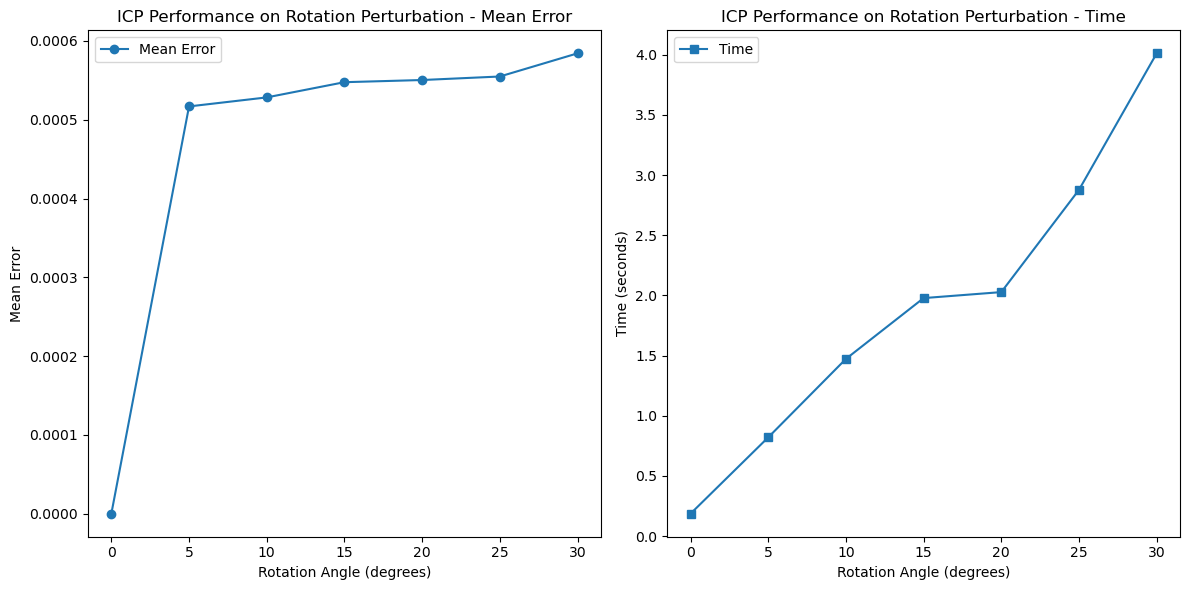

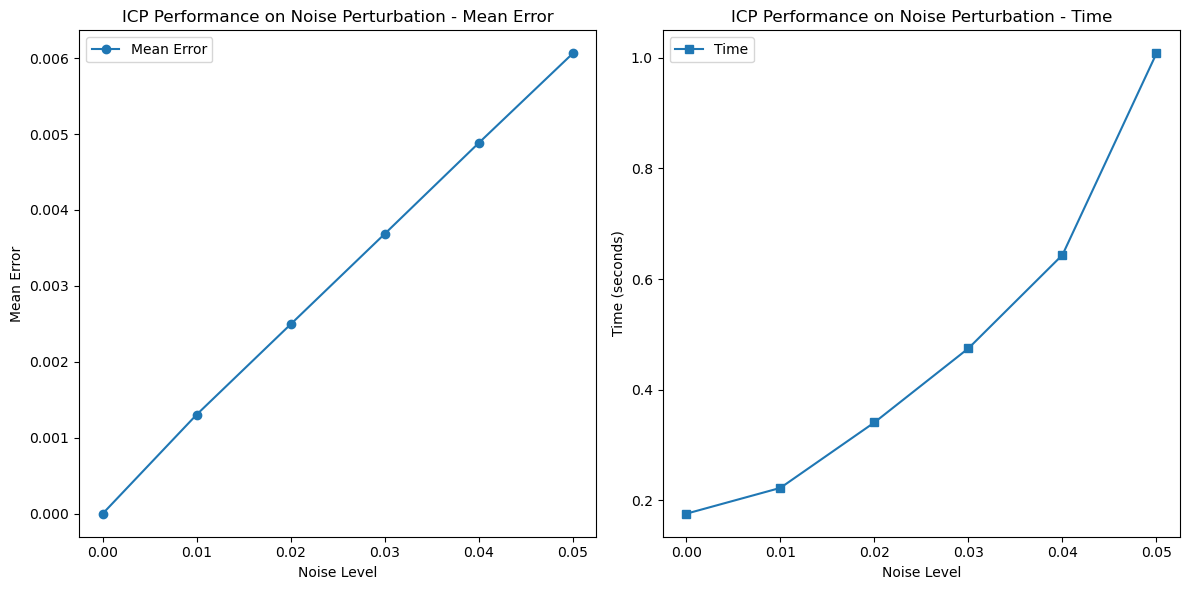

In [7]:
angles_evaluated, mean_errors_rotation, iterations_rotation, times_rotation = zip(*rotation_data)
noise_evaluated, mean_errors_noise, iterations_noise, times_noise = zip(*noise_data)

# rotation
plt.figure(figsize=(12, 6))
# mean_error
plt.subplot(1, 2, 1)
plt.plot(angles_evaluated, mean_errors_rotation, 'o-', label='Mean Error')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Mean Error')
plt.title('ICP Performance on Rotation Perturbation - Mean Error')
plt.legend()
# time
plt.subplot(1, 2, 2)
plt.plot(angles_evaluated, times_rotation, 's-', label='Time')
plt.xlabel('Rotation Angle (degrees)')
plt.ylabel('Time (seconds)')
plt.title('ICP Performance on Rotation Perturbation - Time')
plt.legend()

plt.tight_layout()
plt.show()

# noise
plt.figure(figsize=(12, 6))
# mean error
plt.subplot(1, 2, 1)
plt.plot(noise_evaluated, mean_errors_noise, 'o-', label='Mean Error')
plt.xlabel('Noise Level')
plt.ylabel('Mean Error')
plt.title('ICP Performance on Noise Perturbation - Mean Error')
plt.legend()
# time
plt.subplot(1, 2, 2)
plt.plot(noise_evaluated, times_noise, 's-', label='Time')
plt.xlabel('Noise Level')
plt.ylabel('Time (seconds)')
plt.title('ICP Performance on Noise Perturbation - Time')
plt.legend()

plt.tight_layout()
plt.show()


### 2.3 Sub-Sampling

In [8]:
mesh_src = os.path.join(RES_PATH, 'bun000_v2.ply')
assert os.path.exists(mesh_src), 'cannot found:' + mesh_src
mesh1 = o3d.io.read_triangle_mesh(mesh_src)

mesh_dst = os.path.join(RES_PATH, 'bun045_v2.ply')
assert os.path.exists(mesh_dst), 'cannot found:' + mesh_dst
mesh2 = o3d.io.read_triangle_mesh(mesh_dst)

points_A = np.asarray(mesh1.vertices)
points_B = np.asarray(mesh2.vertices)

In [7]:
# icp for sub-sampling(the logic of our ICP algorithm stays exactly the same)
def icp_sub(src, dst, src_o, dst_o, max_iterations=100, tolerance=1e-4):
    start_time = time.time()
    prev_error = np.inf
    tree = KDTree(dst)

    for i in range(max_iterations):
        distances, indices = tree.query(src, k = 1)
        
        T = best_fit_transform(src, dst[indices])
        np.dot(src, T[0].T, out=src) 
        src += T[1].T
        
        np.dot(src_o, T[0].T, out=src_o)
        src_o += T[1].T 
        
        mean_error = np.mean(distances)
        sum_srror = np.sum(distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error
        # visualize_iteration(src, dst)

    total_time = time.time() - start_time
    return i, total_time, mean_error

In [8]:
def random_subsampling(points, fraction):
    if fraction <= 0 or fraction > 1:
        raise ValueError("Fraction must be within (0, 1].")

    selected_indices = np.random.choice(len(points), size=int(len(points) * fraction), replace=False)
    return points[selected_indices]

def evaluate_subsample(mesh1, mesh2, fractions):
    subsample_results = []
    for fraction in fractions:
        copy_mesh1 = clone_mesh(mesh1)
        copy_mesh2 = clone_mesh(mesh2)
        points_A = np.asarray(copy_mesh1.vertices)
        points_B = np.asarray(copy_mesh2.vertices)
        # visualize_iteration(points_A, points_B)
        subsampled_points_A = random_subsampling(points_A, fraction)
        subsampled_points_B = random_subsampling(points_B, fraction)
        
        # ICP Alignment using subsampled_points_B, subsampled_points_A
        # points_B, points_A are not used to compute T of ICP, but use transform based on it
        iterations, total_time, mean_error = icp_sub(subsampled_points_B, subsampled_points_A, points_B, points_A)
        visualize_iteration(np.asarray(copy_mesh2.vertices), np.asarray(copy_mesh1.vertices))

        print(f"Fraction: {fraction} degrees, Mean error: {mean_error}, Iterations: {iterations}, time:{total_time}")
        subsample_results.append((fraction, mean_error, iterations, total_time))
        
    return subsample_results
    

In [9]:
subsample_fractions = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
subsample_data = evaluate_subsample(mesh1, mesh2, subsample_fractions)

Fraction: 1 degrees, Mean error: 0.001235703762631826, Iterations: 1, time:0.2044353485107422
Fraction: 0.5 degrees, Mean error: 0.0013868274453032734, Iterations: 1, time:0.10350370407104492
Fraction: 0.25 degrees, Mean error: 0.0015960155549620892, Iterations: 1, time:0.05842256546020508
Fraction: 0.1 degrees, Mean error: 0.002016746549103464, Iterations: 1, time:0.04371166229248047
Fraction: 0.05 degrees, Mean error: 0.002543950857904854, Iterations: 1, time:0.01735687255859375
Fraction: 0.01 degrees, Mean error: 0.004409236303452373, Iterations: 1, time:0.0070037841796875


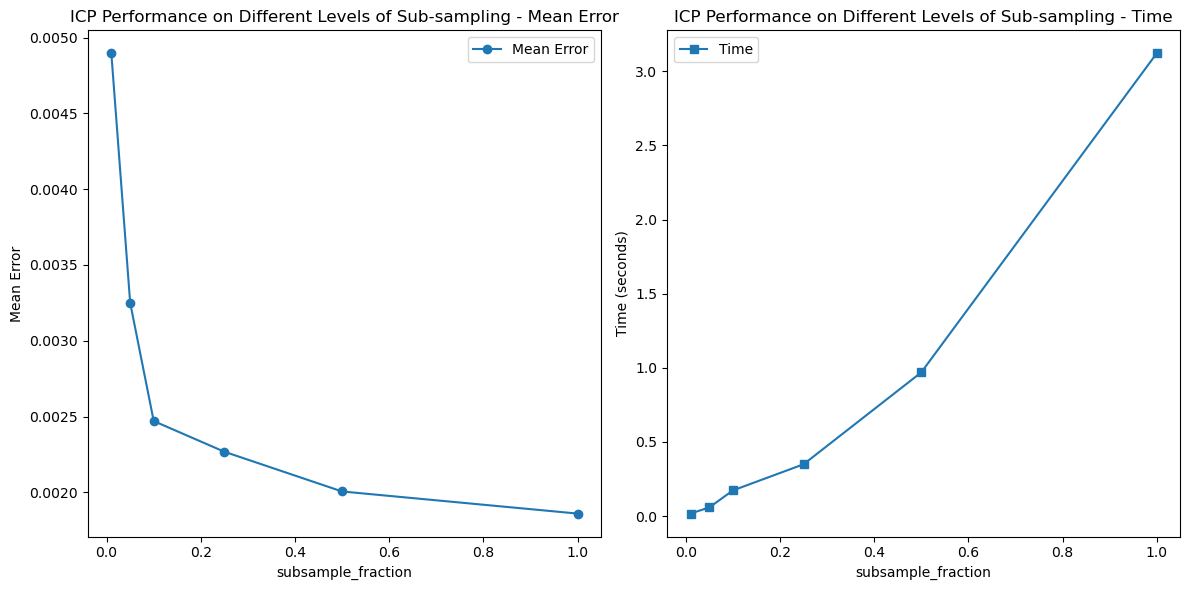

In [13]:
subsample_evaluated, mean_errors_subsample, iterations_subsample, times_subsample = zip(*subsample_data)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(subsample_fractions, mean_errors_subsample, 'o-', label='Mean Error')
plt.xlabel('subsample_fraction')
plt.ylabel('Mean Error')
plt.title('ICP Performance on Different Levels of Sub-sampling - Mean Error')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(subsample_fractions, times_subsample, 's-', label='Time')
plt.xlabel('subsample_fraction')
plt.ylabel('Time (seconds)')
plt.title('ICP Performance on Different Levels of Sub-sampling - Time')
plt.legend()

plt.tight_layout()
plt.show()

### 2.4

In [22]:
# the same as mean error calculation in our previous ICP
def calculate_mean_error(A_mesh, B_mesh):
    A_points = np.asarray(A_mesh.vertices)
    B_points = np.asarray(B_mesh.vertices)

    tree = KDTree(B_points)
    distances, _ = tree.query(A_points)
    mean_error = np.mean(distances)
    return mean_error

# mesh_filenames = ['bun000_v2.ply', 'bun045_v2.ply', 'bun090_v2.ply', 
#                 'bun180_v2.ply', 'bun270_v2.ply','bun315_v2.ply']

# new0090180270.ply is the pre-alignment result obtained by MeshLAb
mesh_filenames = ['new0090180270.ply', 'bun045_v2.ply', 'bun315_v2.ply']


meshes = []
for filename in mesh_filenames:
    mesh_path = os.path.join(RES_PATH, filename)
    assert os.path.exists(mesh_path), f'cannot find: {mesh_path}'
    mesh = o3d.io.read_triangle_mesh(mesh_path)
    meshes.append(mesh)

def multi_icp(meshes, max_iterations=100, tolerance=1e-6):
    # use the first mesh as the the base mesh
    base_mesh = meshes[0] 
    merged_vertices = np.asarray(base_mesh.vertices)
    merged_triangles = np.asarray(base_mesh.triangles)

    remaining_meshes = meshes[1:]

    while remaining_meshes:
        errors = []
        for i, mesh_i in enumerate(remaining_meshes):
            src_points = np.asarray(mesh_i.vertices)
            dst_points = np.asarray(merged_vertices)
            _, _, mean_error = icp(src_points.copy(), dst_points, max_iterations, tolerance)
            errors.append((i, mean_error))

        # choose the mesh with the smalles mear error with the current merged mesh
        min_error_idx, _ = min(errors, key=lambda x: x[1])
        print(min_error_idx)
        mesh_to_merge = remaining_meshes[min_error_idx]

        # ICP Algrothm n=on the mesh with smallest mean_error and the merged mesh
        src_points = np.asarray(mesh_to_merge.vertices)
        iterations, time_total, mean_error = icp(src_points, merged_vertices, max_iterations, tolerance)
        print(f" Iterations: {iterations}, time:{time_total}, mean_error:{mean_error}")
        visualize_iteration(src_points, merged_vertices)
        
        # update vertices and tringles of merged meshes
        offset = len(merged_vertices)
        merged_vertices = np.vstack((merged_vertices, src_points))
        # sub-sample to accelerate the iteration process in ICP
        # merged_vertices = np.random.choice(len(merged_vertices), size=int(len(merged_vertices) * 0.5), replace=False)
        merged_triangles = np.vstack((merged_triangles, np.asarray(mesh_to_merge.triangles) + offset))

        # Remove merged grids from the to-be-merged list
        del remaining_meshes[min_error_idx]

    
    merged_mesh = o3d.geometry.TriangleMesh()
    merged_mesh.vertices = o3d.utility.Vector3dVector(merged_vertices)
    merged_mesh.triangles = o3d.utility.Vector3iVector(merged_triangles)
    merged_mesh.compute_vertex_normals()
    return merged_mesh


aligned_mesh = multi_icp(meshes)
o3d.visualization.draw_geometries([aligned_mesh])
aligned_mesh_path = os.path.join(RES_PATH, 'aligned_mesh.ply')
o3d.io.write_triangle_mesh(aligned_mesh_path, aligned_mesh)

0
 Iterations: 44, time:8.632453441619873, mean_error:0.00031679609467596265
0
 Iterations: 66, time:63.584832191467285, mean_error:0.0003422332342045425


True

### 2.5 Point2Plane ICP

In [11]:
RES_PATH = 'bunny_v2'

mesh_dst = os.path.join(RES_PATH, 'bun000_v2.ply')
assert os.path.exists(mesh_dst), 'cannot found:' + mesh_dst
mesh1 = o3d.io.read_triangle_mesh(mesh_dst)

mesh_src = os.path.join(RES_PATH, 'bun045_v2.ply')
assert os.path.exists(mesh_src), 'cannot found:' + mesh_src
mesh2 = o3d.io.read_triangle_mesh(mesh_src)

points_A = np.asarray(mesh1.vertices)
points_B = np.asarray(mesh2.vertices)

if not mesh1.has_vertex_normals():
    mesh1.compute_vertex_normals()
if not mesh2.has_vertex_normals():
    mesh2.compute_vertex_normals()

normals_A = np.asarray(mesh1.vertex_normals)
normals_B = np.asarray(mesh2.vertex_normals)

from scipy.spatial.transform import Rotation

def solve_least_squares(A, b):
    U, S, VT = np.linalg.svd(A, full_matrices=False)
    S_inv = np.diag(1.0 / S)
    x = VT.T @ S_inv @ U.T @ b
    return x

def best_fit_transform_p2p(src, dst, dst_normals):
        A_matrix = np.empty((len(src), 6))
        b_vector = np.empty(len(src))
        for idx, (s, d, n) in enumerate(zip(src, dst, dst_normals)):
            cross = np.cross(s, n)
            A_matrix[idx] = [cross[0], cross[1], cross[2], n[0], n[1], n[2]]
            b_vector[idx] = -(s - d).T @ n

        # Use svd to solve ls problem over here
        params = solve_least_squares(A_matrix, b_vector)

        # Approximate rotation matrix
        # alpha, beta, gamma = params[:3]
        # S = np.array([[0, -gamma, beta],
        #             [gamma, 0, -alpha],
        #             [-beta, alpha, 0]])
        # R = np.eye(3) + S  

        rotation_vector = params[:3]
        # Use Rotation to construct Rotation Matrix
        rotation = Rotation.from_rotvec(rotation_vector)
        R = rotation.as_matrix()
        t = params[3:6]
        
        return R, t

def point_to_plane_icp_with_svd(src, dst, dst_normals, max_iterations = 100, tolerance=1e-4):
    start_time = time.time()
    prev_error = np.inf
    tree = KDTree(dst)
    
    for i in range(max_iterations):
        
        distances, indices = tree.query(src, k=1)
        indices = np.clip(indices, 0, len(dst) - 1)

        R, t = best_fit_transform_p2p(src, dst[indices], dst_normals[indices])
        np.dot(src, R.T, out=src)
        src += t[:, np.newaxis].T
        
        mean_error = np.mean(distances)
        if np.abs(prev_error - mean_error) < tolerance:
            break
        prev_error = mean_error
        # visualize_iteration(src, dst)

    time_total = time.time() - start_time
    return i + 1, time_total, mean_error


iterations, time_total, mean_error = point_to_plane_icp_with_svd(points_B, points_A, normals_A)
print(f" Iterations: {iterations}, time:{time_total}, mean_error:{mean_error}")
visualize_iteration(points_A, points_B)


o3d.visualization.draw_geometries([mesh1, mesh2])
aligned_mesh_path = os.path.join(RES_PATH, 'bun045_v2_aligned.ply')
combined_mesh = mesh1 + mesh2 
o3d.io.write_triangle_mesh(aligned_mesh_path, combined_mesh) 

 Iterations: 7, time:13.766478300094604, mean_error:0.0008187184719548691


True

#### evaluate and plot

In [34]:
def evaluate_point2plane(mesh1, mesh2, tolerances):
    point2point_results = []
    point2plane_results = []
    for tolerance in tolerances:
        copy_mesh1 = clone_mesh(mesh1)
        copy_mesh2 = clone_mesh(mesh2)
        points_A = np.asarray(copy_mesh1.vertices)
        points_B = np.asarray(copy_mesh2.vertices)
        if not copy_mesh1.has_vertex_normals():
            copy_mesh1.compute_vertex_normals()
        normals_A = np.asarray(copy_mesh1.vertex_normals)
        
        iterations, total_time, mean_error = icp(points_B, points_A, tolerance=tolerance)
        point2point_results.append((tolerance, mean_error, iterations, total_time))
        iterations, total_time, mean_error = point_to_plane_icp_with_svd(points_B, points_A, normals_A, tolerance=tolerance)
        point2plane_results.append((tolerance, mean_error, iterations, total_time))
        
    return point2point_results, point2plane_results

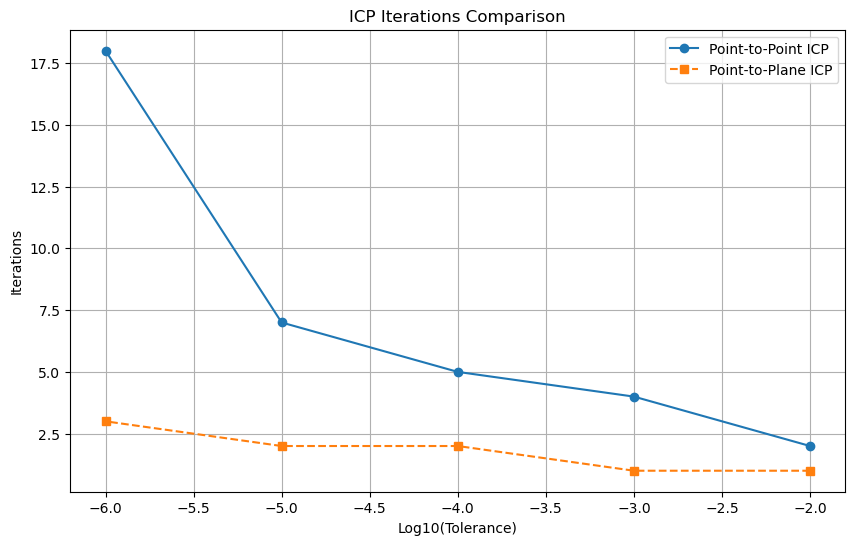

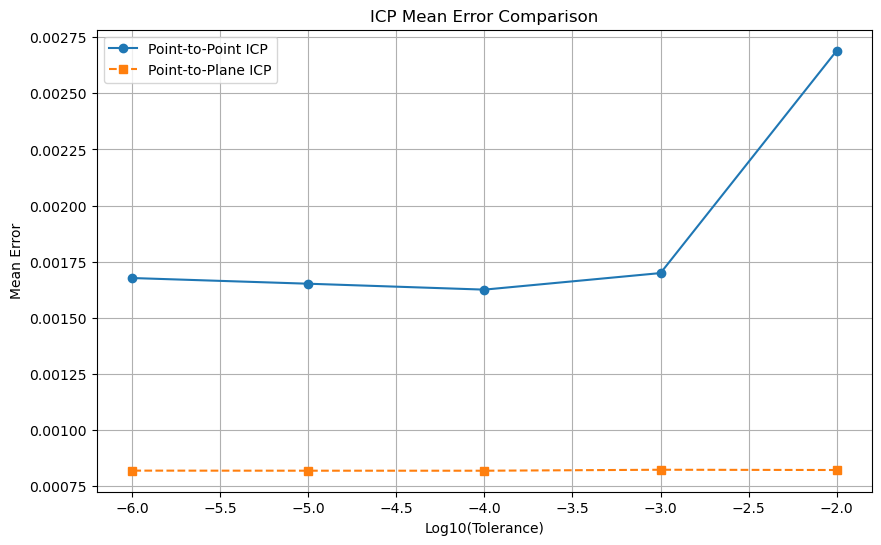

In [42]:
tolerances = [1e-2, 1e-3, 1e-4, 1e-5, 1e-6]
point2point_results, point2plane_results = evaluate_point2plane(mesh1, mesh2, tolerances)

def plot_iterations_comparison(tolerances, point2point_results, point2plane_results):
    tolerances_log = [np.log10(tol) for tol in tolerances]
    p2p_iterations = [result[2] for result in point2point_results]
    p2pl_iterations = [result[2] for result in point2plane_results]

    plt.figure(figsize=(10, 6))
    plt.plot(tolerances_log, p2p_iterations, marker='o', linestyle='-', label='Point-to-Point ICP')
    plt.plot(tolerances_log, p2pl_iterations, marker='s', linestyle='--', label='Point-to-Plane ICP')
    plt.xlabel('Log10(Tolerance)')
    plt.ylabel('Iterations')
    plt.title('ICP Iterations Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

def plot_error_comparison(tolerances, point2point_results, point2plane_results):
    tolerances_log = [np.log10(tol) for tol in tolerances]
    p2p_mean_error = [result[1] for result in point2point_results]
    p2pl_mean_error = [result[1] for result in point2plane_results]

    plt.figure(figsize=(10, 6))
    plt.plot(tolerances_log, p2p_mean_error, marker='o', linestyle='-', label='Point-to-Point ICP')
    plt.plot(tolerances_log, p2pl_mean_error, marker='s', linestyle='--', label='Point-to-Plane ICP')
    plt.xlabel('Log10(Tolerance)')
    plt.ylabel('Mean Error')
    plt.title('ICP Mean Error Comparison')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_iterations_comparison(tolerances, point2point_results, point2plane_results)
plot_error_comparison(tolerances, point2point_results, point2plane_results)